# Folder organization

This folder is divided like 

```
└── first_experiment
    ├── massa1
    │   └── test1-1
    ├── massa2
    │   ├── test1-2
    │   ├── test2-2
    │   └── test3-2
    ├── massa3
    │   ├── test1-3
    │   └── test2-3
    └── massa4
        ├── test1-4
        ├── test2-4
        └── test3-4
```

Inside each folder there are files called ```tps.txt```, ```frq.txt``` and ```mfc.txt```. 

* ```tps.txt``` are the timed data
* ```frq.txt``` is the frequency data
* ```mfc.txt``` is the frequency data

# Show the readed values on graphs

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def readlines(filename: str) -> np.ndarray:
    with open(filename, "r") as file:
        alllines = file.readlines()
    alllines.pop(0)
    alllines.pop(-1)
    for i, line in enumerate(alllines):
        alllines[i] = line.replace("\n", "").split("\t")
        for j, val in enumerate(alllines[i]):    
            alllines[i][j] = float(val)
    return np.array(alllines, dtype="float64")

In [3]:
folders = {"massa1/": ["test1-1/"],
            "massa2/": ["test1-2/", "test2-2/", "test3-2/"],
            "massa3/": ["test1-3/", "test2-3/"],
            "massa4/": ["test1-4/", "test2-4/", "test3-4/"]}

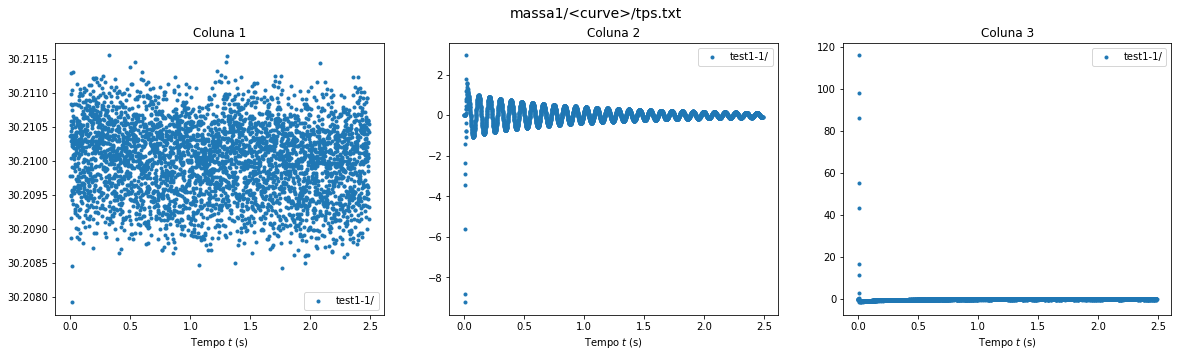

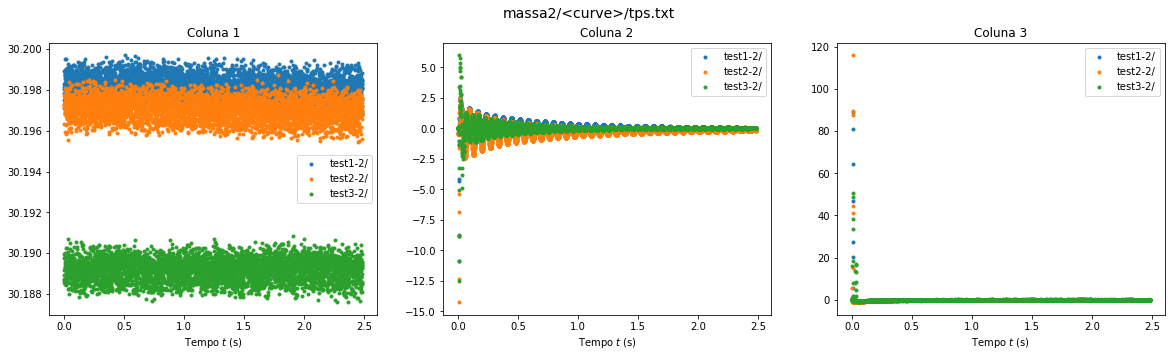

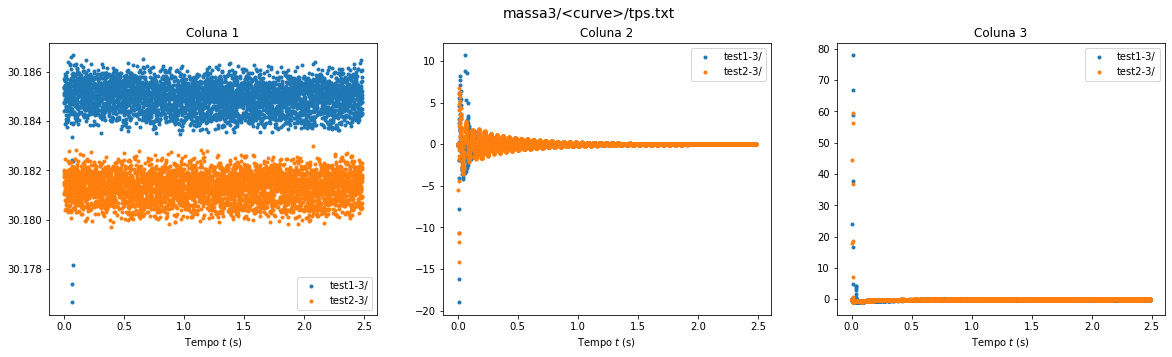

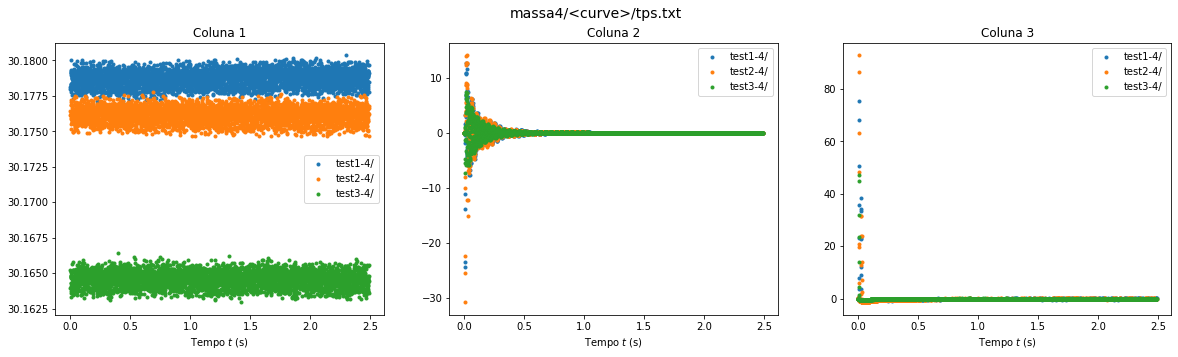

In [4]:
filename = "tps.txt"
for folder, testes in folders.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f"{folder}<curve>/{filename}", fontsize=14)
    for column in range(3):
        for i, teste in enumerate(testes):
            completefilename = folder + teste + filename
            data = readlines(completefilename)
            time = np.array(data[:, 0])
            values = np.array(data[:, 1:])
            axes[column].scatter(time, values[:, column], marker=".", label=teste)
        axes[column].set_title("Coluna %d" % (column+1))
        axes[column].legend()
        axes[column].set_xlabel("Tempo $t$ (s)")

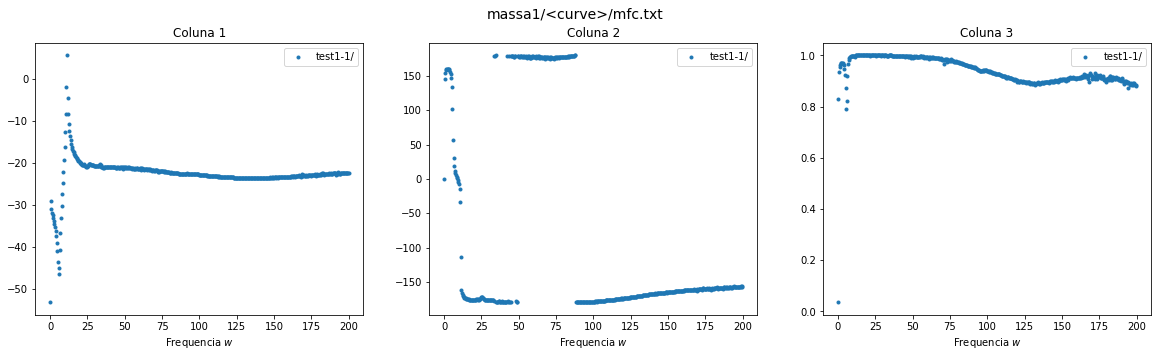

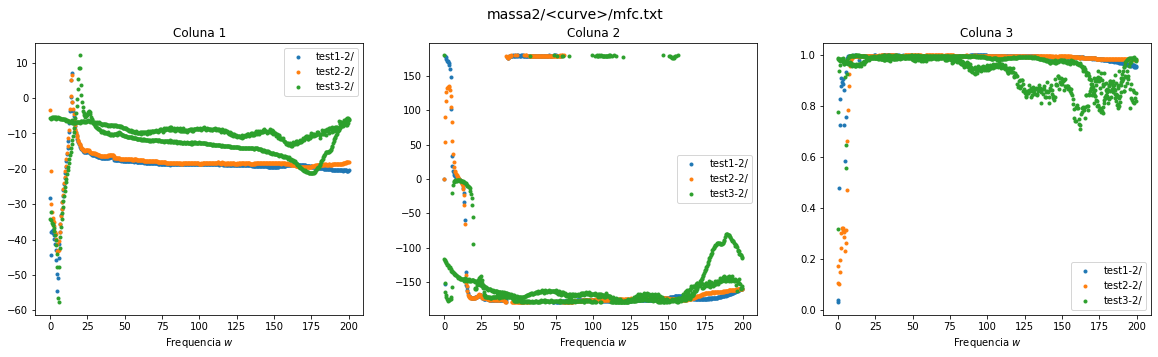

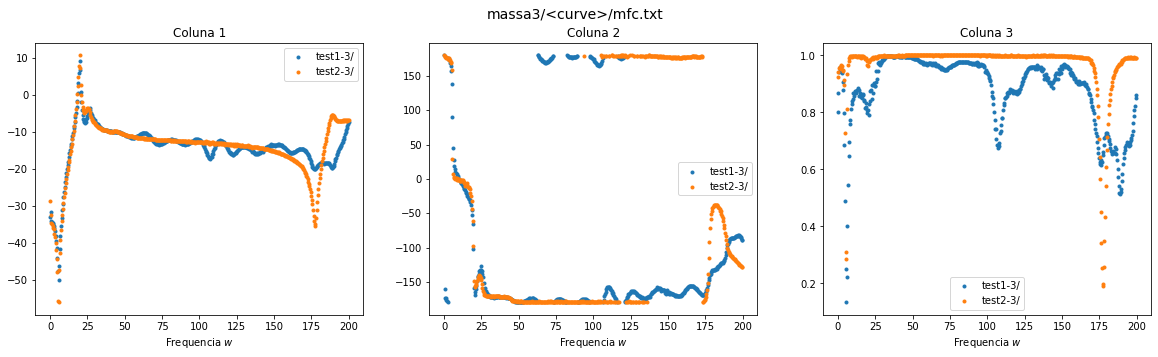

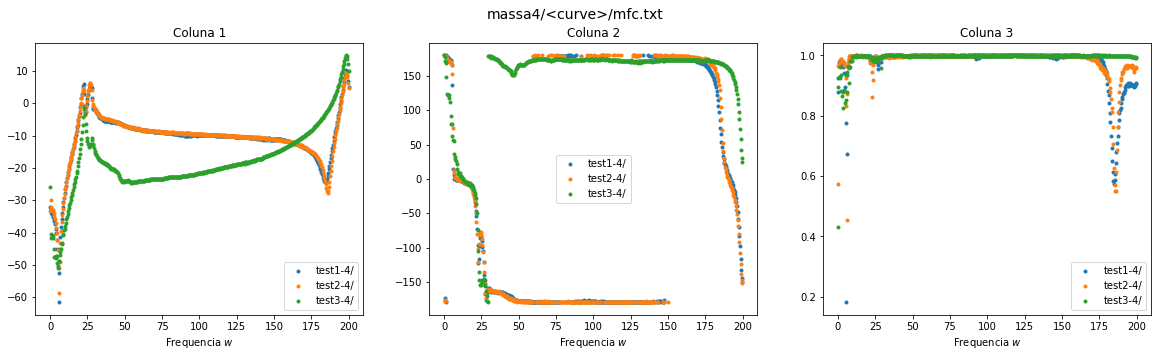

In [5]:
filename = "mfc.txt"
for folder, testes in folders.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f"{folder}<curve>/{filename}", fontsize=14)
    for column in range(3):
        for i, teste in enumerate(testes):
            completefilename = folder + teste + filename
            data = readlines(completefilename)
            freq = np.array(data[:, 0])
            freq = freq[freq<200]  # 200 rad/s is the maximum
            indmax = len(freq)
            values = np.array(data[:indmax, 1:])
            axes[column].scatter(freq, values[:, column], marker=".", label=teste)
        axes[column].set_title("Coluna %d" % (column+1))
        axes[column].legend()
        axes[column].set_xlabel("Frequencia $w$")

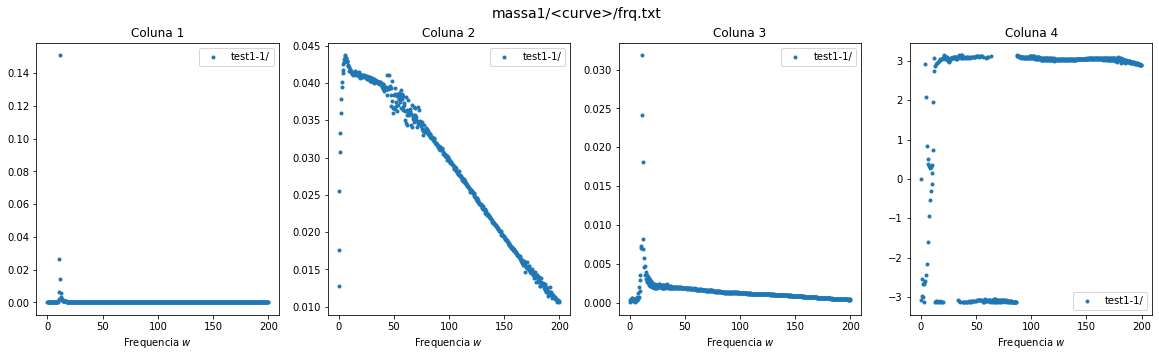

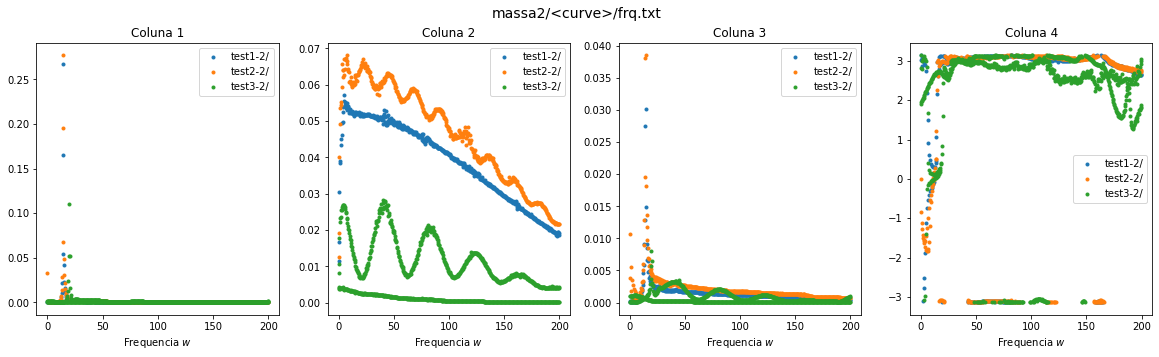

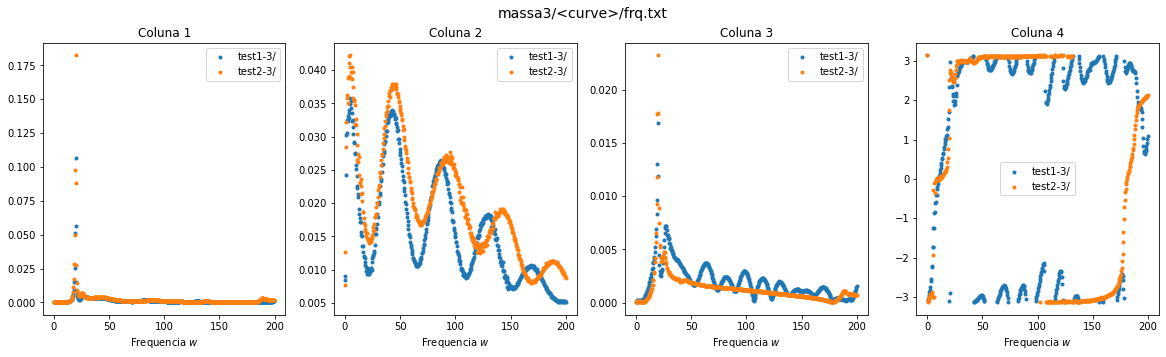

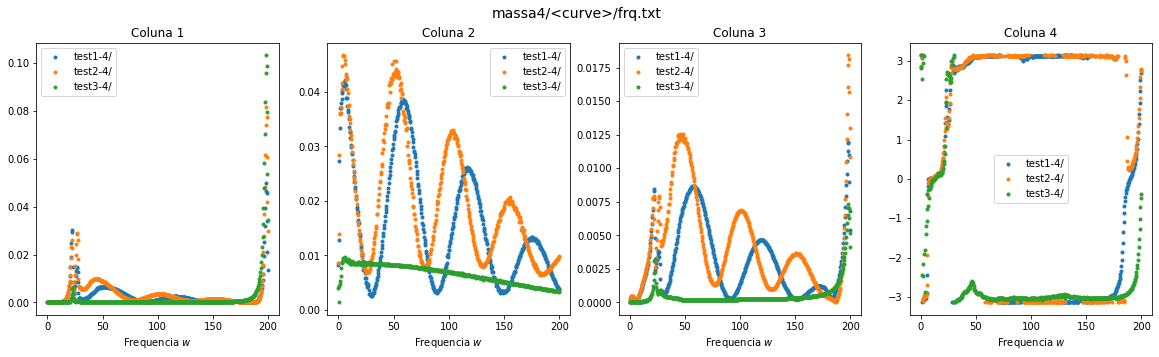

In [6]:
filename = "frq.txt"
for folder, testes in folders.items():
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f"{folder}<curve>/{filename}", fontsize=14)
    for column in range(4):
        for i, teste in enumerate(testes):
            completefilename = folder + teste + filename
            data = readlines(completefilename)
            freq = np.array(data[:, 0])
            freq = freq[freq<200]  # 200 rad/s is the maximum
            indmax = len(freq)
            values = np.array(data[:indmax, 1:])
            axes[column].scatter(freq, values[:, column], marker=".", label=teste)
        axes[column].set_title("Coluna %d" % (column+1))
        axes[column].legend()
        axes[column].set_xlabel("Frequencia $w$")